In [18]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [19]:
img = cv2.imread('/mnt/d/565/hw1/waterfall.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

In [20]:
block_size = 8
img_ycbcr = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
Y = img_ycbcr[:, :, 0]
Cb = img_ycbcr[:, :, 1]
Cr = img_ycbcr[:, :, 2]

h, w = Y.shape

In [21]:
dct_Y = np.zeros_like(Y, dtype=np.float64)
dct_Cb = np.zeros_like(Cb, dtype=np.float64)
dct_Cr = np.zeros_like(Cr, dtype=np.float64)

for row in range(0, h, block_size):
    for col in range(0, w, block_size):
        block_Y = Y[row:row + block_size, col:col + block_size]
        dct_block_Y = cv2.dct(block_Y.astype(np.float32))
        dct_Y[row:row + block_size, col:col + block_size] = dct_block_Y

        block_Cb = Cb[row:row + block_size, col:col + block_size]
        dct_block_Cb = cv2.dct(block_Cb.astype(np.float32))
        dct_Cb[row:row + block_size, col:col + block_size] = dct_block_Cb

        block_Cr = Cr[row:row + block_size, col:col + block_size]
        dct_block_Cr = cv2.dct(block_Cr.astype(np.float32))
        dct_Cr[row:row + block_size, col:col + block_size] = dct_block_Cr

In [22]:
QY = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
               [12, 12, 14, 19, 26, 58, 60, 55],
               [14, 13, 16, 24, 40, 57, 69, 56],
               [14, 17, 22, 29, 51, 87, 89, 62],
               [18, 22, 37, 56, 68, 109, 103, 77],
               [24, 35, 55, 64, 81, 104, 113, 92],
               [49, 64, 78, 87, 108, 121, 120, 101],
               [72, 92, 95, 98, 112, 100, 103, 99]])

QC = np.array([[17, 18, 24, 47, 99, 99, 99, 99],
               [18, 21, 26, 66, 99, 99, 99, 99],
               [24, 26, 56, 99, 99, 99, 99, 99],
               [47, 66, 99, 99, 99, 99, 99, 99],
               [99, 99, 99, 99, 99, 99, 99, 99],
               [99, 99, 99, 99, 99, 99, 99, 99],
               [99, 99, 99, 99, 99, 99, 99, 99],
               [99, 99, 99, 99, 99, 99, 99, 99]])

In [23]:
quantized_Y = np.zeros_like(Y, dtype=np.float64)
quantized_Cb = np.zeros_like(Cb, dtype=np.float64)
quantized_Cr = np.zeros_like(Cr, dtype=np.float64)

for row in range(0, h, block_size):
    for col in range(0, w, block_size):
        block_Y = dct_Y[row:row + block_size, col:col + block_size]
        quantized_block_Y = np.round(block_Y / QY)
        quantized_Y[row:row + block_size, col:col + block_size] = quantized_block_Y

        block_Cb = dct_Cb[row:row + block_size, col:col + block_size]
        quantized_block_Cb = np.round(block_Cb / QC)
        quantized_Cb[row:row + block_size, col:col + block_size] = quantized_block_Cb

        block_Cr = dct_Cr[row:row + block_size, col:col + block_size]
        quantized_block_Cr = np.round(block_Cr / QC)
        quantized_Cr[row:row + block_size, col:col + block_size] = quantized_block_Cr

In [24]:
dequantized_Y = np.zeros_like(quantized_Y, dtype=np.float64)
dequantized_Cb = np.zeros_like(quantized_Cb, dtype=np.float64)
dequantized_Cr = np.zeros_like(quantized_Cr, dtype=np.float64)

for row in range(0, h, block_size):
    for col in range(0, w, block_size):
        block_Y = quantized_Y[row:row + block_size, col:col + block_size]
        dequantized_block_Y = block_Y * QY
        dequantized_Y[row:row + block_size, col:col + block_size] = dequantized_block_Y

        block_Cb = quantized_Cb[row:row + block_size, col:col + block_size]
        dequantized_block_Cb = block_Cb * QC
        dequantized_Cb[row:row + block_size, col:col + block_size] = dequantized_block_Cb

        block_Cr = quantized_Cr[row:row + block_size, col:col + block_size]
        dequantized_block_Cr = block_Cr * QC
        dequantized_Cr[row:row + block_size, col:col + block_size] = dequantized_block_Cr

In [25]:
reconstructed_Y = np.zeros_like(Y, dtype=np.float64)
reconstructed_Cb = np.zeros_like(Cb, dtype=np.float64)
reconstructed_Cr = np.zeros_like(Cr, dtype=np.float64)

for row in range(0, h, block_size):
    for col in range(0, w, block_size):
        block_Y = dequantized_Y[row:row + block_size, col:col + block_size]
        idct_block_Y = cv2.idct(block_Y.astype(np.float32))
        reconstructed_Y[row:row + block_size, col:col + block_size] = idct_block_Y

        block_Cb = dequantized_Cb[row:row + block_size, col:col + block_size]
        idct_block_Cb = cv2.idct(block_Cb.astype(np.float32))
        reconstructed_Cb[row:row + block_size, col:col + block_size] = idct_block_Cb

        block_Cr = dequantized_Cr[row:row + block_size, col:col + block_size]
        idct_block_Cr = cv2.idct(block_Cr.astype(np.float32))
        reconstructed_Cr[row:row + block_size, col:col + block_size] = idct_block_Cr

reconstructed_image_ycbcr = cv2.merge((reconstructed_Y, reconstructed_Cb, reconstructed_Cr))
reconstructed_image = cv2.cvtColor(reconstructed_image_ycbcr.astype(np.uint8), cv2.COLOR_YCrCb2RGB)

In [26]:
error_image = cv2.absdiff(img_rgb, reconstructed_image)
mse = np.mean((img_rgb.astype(np.float64) - reconstructed_image.astype(np.float64)) ** 2)
psnr = 10 * np.log10(255**2 / mse)

print("MSE:", mse)
print("PSNR", psnr)

MSE: 256.9385080295139
PSNR 24.032511629019023


Text(0.5, 1.0, 'Original Image')

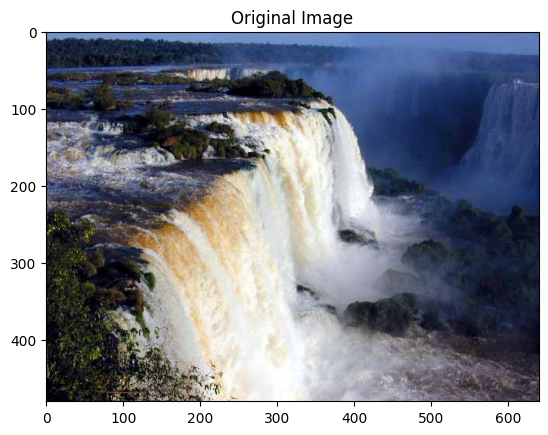

In [27]:
plt.figure()
plt.imshow(img_rgb)
plt.title("Original Image")

Text(0.5, 1.0, 'Reconstructed Image')

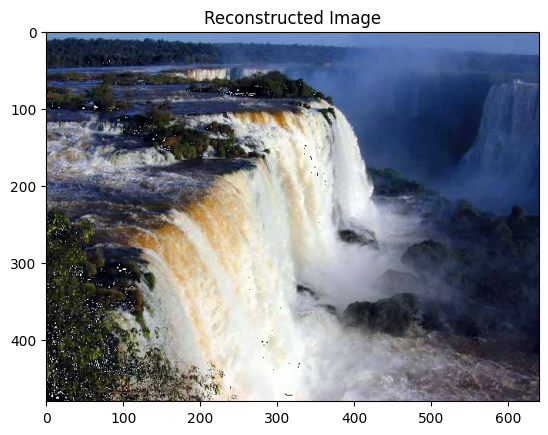

In [28]:
plt.figure()
plt.imshow(reconstructed_image)
plt.title("Reconstructed Image")

Text(0.5, 1.0, 'Error Difference Image')

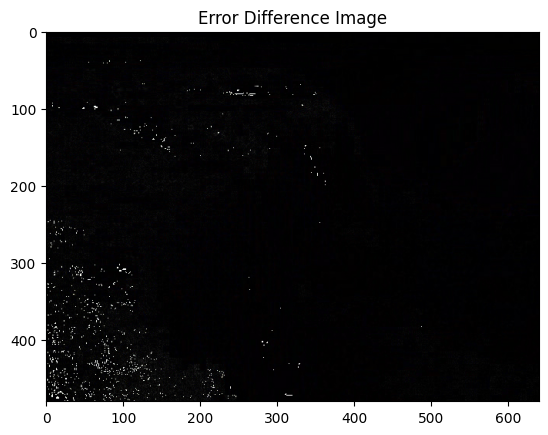

In [29]:
plt.figure()
plt.imshow(error_image)
plt.title("Error Difference Image")